In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sb
import statistics as stats 
from sklearn import linear_model
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import train_test_split

In [3]:
df1 = pd.read_csv('./train.csv')
df2 = pd.read_csv('./test.csv')
df3 = df2
df1.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df1 = pd.get_dummies(df1, columns= ['Embarked'], drop_first=True)
df2 = pd.get_dummies(df2, columns= ['Embarked'], drop_first=True)
df1.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,0,1


Pclass        0
Sex           0
Age           0
SibSp         0
Parch         0
Fare          0
Embarked_Q    0
Embarked_S    0
dtype: int64


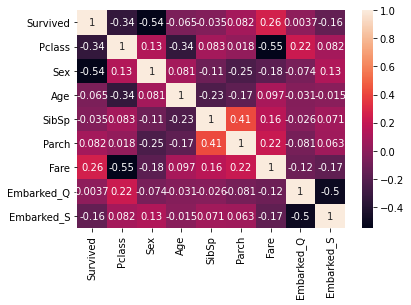

In [5]:
try:
    df1 = df1.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis = 1)
    df2 = df2.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis =1)
    df1.Sex = df1['Sex'].replace({'male':1, 'female':0})
    df1['Age'].fillna(round(df1['Age'].median()), inplace=True) 
    df2.Sex = df2['Sex'].replace({'male':1, 'female':0})
    df2['Age'].fillna(round(df2['Age'].median()), inplace=True) 
    df2['Fare'].fillna(round(df2['Fare'].median()), inplace=True)
except:
    df1.Sex = df1['Sex'].replace({'male':1, 'female':0})
    df1['Age'].fillna(round(df1['Age'].median()), inplace=True) 
    df2.Sex = df2['Sex'].replace({'male':1, 'female':0})
    df2['Age'].fillna(round(df2['Age'].median()), inplace=True)
    df2['Fare'].fillna(round(df2['Fare'].median()), inplace=True)
sb.heatmap(df1.corr(), annot= True);
print(df2.isnull().sum())

## Decision tree

In [6]:
X = df1.drop('Survived', axis = 1)
Y = df1.Survived
X1 = df2
X_TRAIN = X
X_TEST = X1
Y_TRAIN = Y
print(X_TRAIN.shape)
print(X_TEST.shape)
print(Y_TRAIN.shape)

(891, 8)
(418, 8)
(891,)


In [7]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(max_depth = 5,criterion = 'gini',random_state = 1)
dtree.fit(X_TRAIN, Y_TRAIN)
print(dtree.score(X_TRAIN, Y_TRAIN))

0.8406285072951739


In [8]:
y_pred = dtree.predict(X_TEST)

In [9]:
data = {
    'PassengerId':list(df3.PassengerId),
    'Survived':list(y_pred)
}
df_final = pd.DataFrame(data)
df_final.to_csv('./KaggleSubmission3.csv', index = False)

## Bagging

In [10]:
from sklearn.ensemble import BaggingClassifier
bgcl = BaggingClassifier(n_estimators= 100, base_estimator = dtree, random_state= 1)
bgcl.fit(X_TRAIN, Y_TRAIN)
bgcl.score(X_TRAIN, Y_TRAIN)

0.8585858585858586

In [11]:
y_pred = bgcl.predict(X_TEST)
data = {
    'PassengerId':list(df3.PassengerId),
    'Survived':list(y_pred)
}
df_final = pd.DataFrame(data)
df_final.to_csv('./KaggleSubmission4.csv', index = False)

## Adaboost

In [12]:
from sklearn.ensemble import AdaBoostClassifier
abcl = AdaBoostClassifier(n_estimators = 50, random_state=1)
abcl.fit(X_TRAIN,Y_TRAIN)
abcl.score(X_TRAIN, Y_TRAIN)

0.8305274971941639

In [13]:
y_pred = abcl.predict(X_TEST)
data = {
    'PassengerId':list(df3.PassengerId),
    'Survived':list(y_pred)
}
df_final = pd.DataFrame(data)
df_final.to_csv('./KaggleSubmission5.csv', index = False)

## Gradient Boost

In [14]:
from sklearn.ensemble import GradientBoostingClassifier
gbcl = GradientBoostingClassifier(n_estimators= 50, random_state= 1)
gbcl.fit(X_TRAIN, Y_TRAIN)
gbcl.score(X_TRAIN,Y_TRAIN)

0.867564534231201

In [15]:
y_pred = gbcl.predict(X_TEST)
data = {
    'PassengerId':list(df3.PassengerId),
    'Survived':list(y_pred)
}
df_final = pd.DataFrame(data)
df_final.to_csv('./KaggleSubmission6.csv', index = False)

## Working with scaled data

In [17]:
from sklearn import preprocessing
scaler = preprocessing.StandardScaler().fit(X_TRAIN)
X_SCALED = scaler.fit_transform(X_TRAIN)
X_TEST_SCALED = scaler.transform(X_TEST)

## Logistic on fitted

In [18]:
lg = linear_model.LogisticRegression(random_state= 1)
lg.fit(X_SCALED, Y_TRAIN)
lg.score(X_SCALED, Y_TRAIN)

0.8002244668911336

In [38]:
y_pred = lg.predict(X_TEST_SCALED)
data = {
    'PassengerId':list(df3.PassengerId),
    'Survived':list(y_pred)
}
df_final = pd.DataFrame(data)
df_final.to_csv('./KaggleSubmissionScaled1.csv', index = False)

## Decision tree on fitted

In [32]:
dt = DecisionTreeClassifier(max_depth= 5, criterion='gini', random_state= 1)
dt.fit(X_SCALED, Y_TRAIN)
dt.score(X_SCALED, Y_TRAIN)

0.8406285072951739

In [39]:
y_pred = dt.predict(X_TEST_SCALED)
data = {
    'PassengerId':list(df3.PassengerId),
    'Survived':list(y_pred)
}
df_final = pd.DataFrame(data)
df_final.to_csv('./KaggleSubmissionScaled2.csv', index = False)

## Bagging

In [37]:
bgcl1 = BaggingClassifier(base_estimator=dt, random_state= 1, n_estimators=150)
bgcl1.fit(X_SCALED, Y_TRAIN)
bgcl1.score(X_SCALED, Y_TRAIN)

0.8641975308641975

In [44]:
y_pred = bgcl1.predict(X_TEST_SCALED)
data = {
    'PassengerId':list(df3.PassengerId),
    'Survived':list(y_pred)
}
df_final = pd.DataFrame(data)
df_final.to_csv('./KaggleSubmissionScaled3.csv', index = False)

## Adaboost

In [48]:
abcl1 = AdaBoostClassifier(n_estimators=100, random_state= 1)
abcl1.fit(X_SCALED, Y_TRAIN)
abcl1.score(X_SCALED, Y_TRAIN)

0.8462401795735129

In [49]:
y_pred = abcl1.predict(X_TEST_SCALED)
data = {
    'PassengerId':list(df3.PassengerId),
    'Survived':list(y_pred)
}
df_final = pd.DataFrame(data)
df_final.to_csv('./KaggleSubmissionScaled4.csv', index = False)

## Gradient boosting

In [66]:
gbcl1 = GradientBoostingClassifier(n_estimators=75, max_depth= 3, random_state= 1)
gbcl1.fit(X_SCALED, Y_TRAIN)
gbcl1.score(X_SCALED, Y_TRAIN)

0.8787878787878788

In [68]:
y_pred = gbcl1.predict(X_TEST_SCALED)
data = {
    'PassengerId':list(df3.PassengerId),
    'Survived':list(y_pred)
}
df_final = pd.DataFrame(data)
df_final.to_csv('./KaggleSubmissionScaled5.csv', index = False)